<a href="https://colab.research.google.com/github/morsheduluofc/DeepLearning/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the dependencies

import os
import cv2
import zipfile
import random
from urllib import request 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img_database=np.loadtxt('fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]
print(img_database.shape)
total_number_images=(img_database.shape[0])

In [ ]:
#Network parameters of Nural networks 
n_input=784
hidden_layer_1=256
hidden_layer_2=32
hidden_layer_3=32
hidden_layer_4=256
output_layer=784

#Hyperparameters of NN
learning_rate=0.1
epochs=100
batch_size=128

In [ ]:
#Building tensorflow graph
X=tf.placeholder(tf.float32,[None,n_input])
Y=tf.placeholder(tf.float32,[None,output_layer])

#Weight and bias definition
nn_weight={"W1":tf.Variable(tf.truncated_normal([n_input,hidden_layer_1])),
           "W2":tf.Variable(tf.truncated_normal([hidden_layer_1,hidden_layer_2])),
           "W3":tf.Variable(tf.truncated_normal([hidden_layer_2,hidden_layer_3])),
           "W4":tf.Variable(tf.truncated_normal([hidden_layer_3,hidden_layer_4])),
           "W5":tf.Variable(tf.truncated_normal([hidden_layer_4,output_layer])),
            }
nn_bias={"B1":tf.Variable(tf.truncated_normal([hidden_layer_1])),
         "B2":tf.Variable(tf.truncated_normal([hidden_layer_2])),
         "B3":tf.Variable(tf.truncated_normal([hidden_layer_3])),
         "B4":tf.Variable(tf.truncated_normal([hidden_layer_4])),
         "B5":tf.Variable(tf.truncated_normal([output_layer]))
         }

In [ ]:
#Neural network
Z1=tf.add(tf.matmul(X, nn_weight["W1"]),nn_bias["B1"])
Z1_out=tf.nn.sigmoid(Z1)

Z2=tf.add(tf.matmul(Z1_out, nn_weight["W2"]),nn_bias["B2"])
Z2_out=tf.nn.sigmoid(Z2)

Z3=tf.add(tf.matmul(Z2_out, nn_weight["W3"]),nn_bias["B3"])
Z3_out=tf.nn.sigmoid(Z3)

Z4=tf.add(tf.matmul(Z3_out, nn_weight["W4"]),nn_bias["B4"])
Z4_out=tf.nn.sigmoid(Z4)

Z5=tf.add(tf.matmul(Z4_out, nn_weight["W5"]),nn_bias["B5"])
NN_output=(Z5)

In [ ]:
Z1=tf.layers.dense(X,hidden_layer_1,activation=tf.nn.sigmoid)
Z2=tf.layers.dense(Z1,hidden_layer_2,activation=tf.nn.sigmoid)
Z3=tf.layers.dense(Z2,hidden_layer_3,activation=tf.nn.sigmoid)
Z4=tf.layers.dense(Z3,hidden_layer_4,activation=tf.nn.sigmoid)
NN_output=tf.layers.dense(Z4,output_layer)

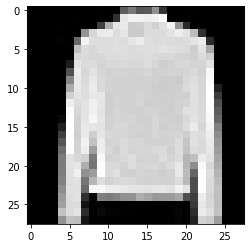

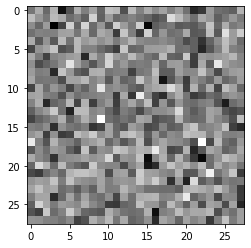

In [ ]:
#Dataset preparation

#Shuffle data
np.random.shuffle(img_database)
X_train=img_database

#Normalize the dataset
X_train=X_train/255

#Create a noisy datset
X_train_noisy=X_train+10*np.random.normal(0,1,size=X_train.shape)

#Original images
plt.imshow(X_train[0].reshape(28,28),cmap='gray')
plt.show()

#Noisy images
plt.imshow(X_train_noisy[0].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
#Define the metrics

#Define loss function
computed_loss=tf.reduce_mean(tf.square(NN_output-Y))

#Define the optimizer
optimizer=tf.train.AdadeltaOptimizer(learning_rate).minimize(computed_loss)

#initalize the variable
init=tf.global_variables_initializer()

In [ ]:
#Initialize the session
sess=tf.Session()
sess.run(init)

for epoch in range(epochs):
  for i in range(int(total_number_images/batch_size)):
    x_epoch=X_train[i*batch_size:(i+1)*batch_size]
    x_noise_epoch=X_train_noisy[i*batch_size:(i+1)*batch_size]
    _,loss=sess.run([optimizer,computed_loss],feed_dict={X: x_noise_epoch, Y: x_epoch})
  print('Epoch', epoch, '/', epochs, 'loss:', loss)

Epoch 0 / 100 loss: 36.42757
Epoch 1 / 100 loss: 10.922244
Epoch 2 / 100 loss: 2.0506482
Epoch 3 / 100 loss: 0.6786989
Epoch 4 / 100 loss: 0.3190608
Epoch 5 / 100 loss: 0.18499681
Epoch 6 / 100 loss: 0.13132955
Epoch 7 / 100 loss: 0.107461154
Epoch 8 / 100 loss: 0.09714037
Epoch 9 / 100 loss: 0.0925073
Epoch 10 / 100 loss: 0.090181835
Epoch 11 / 100 loss: 0.088929586
Epoch 12 / 100 loss: 0.08822118
Epoch 13 / 100 loss: 0.08780102
Epoch 14 / 100 loss: 0.08753784
Epoch 15 / 100 loss: 0.08736328
Epoch 16 / 100 loss: 0.08724125
Epoch 17 / 100 loss: 0.08715197
Epoch 18 / 100 loss: 0.08708419
Epoch 19 / 100 loss: 0.08703113
Epoch 20 / 100 loss: 0.086988546
Epoch 21 / 100 loss: 0.08695367
Epoch 22 / 100 loss: 0.08692459
Epoch 23 / 100 loss: 0.08689998
Epoch 24 / 100 loss: 0.08687891
Epoch 25 / 100 loss: 0.08686066
Epoch 26 / 100 loss: 0.0868447
Epoch 27 / 100 loss: 0.08683064
Epoch 28 / 100 loss: 0.08681816
Epoch 29 / 100 loss: 0.086807
Epoch 30 / 100 loss: 0.08679696
Epoch 31 / 100 loss: 0.0

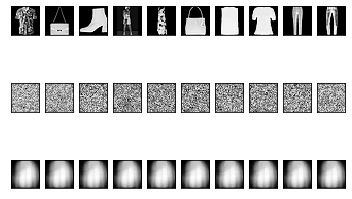

In [ ]:
#pick any image
X_actual=X_train[20:30]
noisy_image=X_train_noisy[20:30]

#run it through the autoencoder
denoised_image=sess.run(NN_output,feed_dict={X:noisy_image})

#print the original image
#fig, axes=plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize(20,4))
fig, axes=plt.subplots(3, 10, True, True,(20,4))

for images, row in zip([X_actual, noisy_image, denoised_image], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)),cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)